In [19]:
import pandas as pd
import numpy as np
import datetime
import time
import requests
from bs4 import BeautifulSoup
import os
from selenium.webdriver.common.keys import Keys 
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import seaborn as sns
import pyperclip


In [11]:
from overview_trial import df_overview
df_overview

,Company,Sector,Industry,Country
Ticker,,,,
A,"Agilent Technologies, Inc.",Healthcare,Diagnostics & Research,USA
AA,Alcoa Corporation,Basic Materials,Aluminum,USA
AACG,ATA Creativity Global,Consumer Defensive,Education & Training Services,China
AACQ,Artius Acquisition Inc.,Financial,Shell Companies,USA
AAIC,Arlington Asset Investment Corp.,Real Estate,REIT - Mortgage,USA
...,...,...,...,...
ZVO,Zovio Inc,Consumer Defensive,Education & Training Services,USA
ZWRKU,Z-Work Acquisition Corp.,Financial,Shell Companies,USA
ZYME,Zymeworks Inc.,Healthcare,Biotechnology,Canada


In [6]:
from IBD import df_ibd
df_ibd

Symbol,Price,Price $ Change,Price % Change,Comp. Rating,EPS Rating,RS Rating,Ind Grp RS,SMR Rating,Acc/Dis Rating,Spon Rating,Vol. % Change,Vol. (1000s)
HWM,30.39,0.84,2.84,63.0,38.0,81.0,12.0,2.0,5.0,3.0,-5.0,3223
ABM,46.20,1.76,3.96,67.0,76.0,61.0,6.0,3.0,8.0,3.0,1.0,306
ABT,117.26,1.25,1.08,71.0,91.0,59.0,3.0,5.0,1.0,3.0,-22.0,3784
ACU,35.68,-2.22,-5.86,91.0,85.0,78.0,7.0,4.0,6.0,1.0,26.0,18
ADI,148.88,4.36,3.02,87.0,87.0,54.0,10.0,5.0,4.0,4.0,39.0,3873
...,...,...,...,...,...,...,...,...,...,...,...,...
NGAB,10.13,0.00,0.00,NaN,1.0,1.0,4.0,NaN,NaN,NaN,NaN,447
PNTM,9.83,0.00,0.00,NaN,1.0,1.0,4.0,NaN,NaN,NaN,NaN,74
SWET,9.75,0.00,0.00,NaN,1.0,1.0,4.0,NaN,NaN,NaN,NaN,12
ENFA,9.79,0.00,0.00,NaN,1.0,1.0,4.0,NaN,NaN,NaN,NaN,3


In [7]:
from scraping import df_tt
df_tt

,Beta,ATR,SMA20,SMA50,SMA200,52W High,52W Low,RSI,Price,from Open,Gap
Ticker,,,,,,,,,,,
AB,1.45,1.23,-0.0049,0.0367,0.2213,-0.0570,1.8240,52.73,37.39,0.0108,0.0145
ABC,0.48,2.89,-0.0058,0.0060,0.0422,-0.0713,0.4548,50.42,104.83,0.0106,0.0072
ABR,1.87,0.66,-0.0139,0.0496,0.3006,-0.0878,3.4294,49.81,15.68,-0.0279,0.0132
ABT,0.72,2.95,-0.0485,0.0041,0.1095,-0.0878,0.9031,42.50,117.25,0.0064,0.0042
ACGL,0.85,1.01,0.0337,0.0465,0.1350,-0.1394,0.7377,61.93,36.37,0.0080,0.0106
...,...,...,...,...,...,...,...,...,...,...,...
XPER,0.77,0.96,0.0519,0.0648,0.3805,-0.0066,1.4917,62.29,22.45,0.0076,0.0136
Y,0.67,15.16,0.0208,0.0418,0.1309,-0.1151,0.4826,56.40,632.87,-0.0026,0.0141
YY,1.01,8.66,-0.0746,0.1382,0.3304,-0.2168,1.8281,49.20,116.60,-0.0173,0.0064


In [8]:
df_rs = df_ibd[df_ibd['RS Rating'] > 70]
df_rs

Symbol,Price,Price $ Change,Price % Change,Comp. Rating,EPS Rating,RS Rating,Ind Grp RS,SMR Rating,Acc/Dis Rating,Spon Rating,Vol. % Change,Vol. (1000s)
HWM,30.39,0.84,2.84,63.0,38.0,81.0,12.0,2.0,5.0,3.0,-5.0,3223
ACU,35.68,-2.22,-5.86,91.0,85.0,78.0,7.0,4.0,6.0,1.0,26.0,18
NBR,126.74,12.50,10.90,72.0,7.0,96.0,13.0,1.0,13.0,3.0,0.0,267
SWKS,173.44,6.23,3.73,94.0,84.0,71.0,10.0,5.0,7.0,4.0,45.0,3510
HES,74.95,4.16,5.88,60.0,14.0,80.0,12.0,1.0,12.0,3.0,80.0,3751
...,...,...,...,...,...,...,...,...,...,...,...,...
LEXX,5.45,0.00,0.08,35.0,42.0,74.0,3.0,2.0,NaN,NaN,-61.0,127
ZIM,19.29,-0.94,-4.65,87.0,74.0,94.0,13.0,NaN,NaN,NaN,-51.0,488
TIRX,57.80,-15.10,-20.70,22.0,8.0,97.0,2.0,2.0,NaN,NaN,-62.0,64
GHVI,13.87,0.65,4.92,16.0,1.0,79.0,4.0,NaN,NaN,NaN,17.0,6016


In [9]:
trend_template_list = pd.merge(df_rs, df_tt, left_index=True, right_index=True).index.tolist()
len(trend_template_list)

311

In [17]:
trend_template_list

['SWKS',
 'AVY',
 'BC',
 'DAN',
 'DE',
 'DIOD',
 'EQT',
 'FDX',
 'TGNA',
 'GM',
 'LDL',
 'LLY',
 'LPX',
 'LB',
 'JEF',
 'MAT',
 'MDP',
 'OLN',
 'AFG',
 'ROG',
 'SGC',
 'SKY',
 'SNA',
 'WGO',
 'FL',
 'SPB',
 'MATX',
 'AMAT',
 'NATR',
 'CSWC',
 'CTO',
 'FHN',
 'HVT',
 'HWKN',
 'KLAC',
 'KLIC',
 'MDC',
 'MYE',
 'NSSC',
 'OMI',
 'UNM',
 'PATK',
 'TFC',
 'STKL',
 'VMI',
 'WDFC',
 'OPY',
 'PAR',
 'COOP',
 'HCA',
 'RJF',
 'SF',
 'THO',
 'GBCI',
 'LRCX',
 'MU',
 'REX',
 'IIIN',
 'RADA',
 'MCY',
 'CLDX',
 'FRC',
 'FCNCA',
 'CRMT',
 'UBSI',
 'PII',
 'IMKTA',
 'SCHW',
 'JOUT',
 'PXD',
 'MOS',
 'PRK',
 'SSP',
 'MERC',
 'MGPI',
 'IMGN',
 'CPE',
 'NTP',
 'MLI',
 'AES',
 'ZBRA',
 'MSON',
 'ELY',
 'MHK',
 'AGCO',
 'BKE',
 'AVNT',
 'CENT',
 'PFC',
 'FFIN',
 'SCHN',
 'MLM',
 'SILC',
 'BCRX',
 'LEA',
 'EXP',
 'MATW',
 'ADTN',
 'UHAL',
 'COF',
 'RCII',
 'SBGI',
 'FCX',
 'KFRC',
 'SENEA',
 'SAM',
 'SASR',
 'CNOB',
 'OCFC',
 'TRQ',
 'TTEC',
 'CSV',
 'OPCH',
 'HIBB',
 'UNFI',
 'LAD',
 'VCEL',
 'ANDE',
 'PPBI

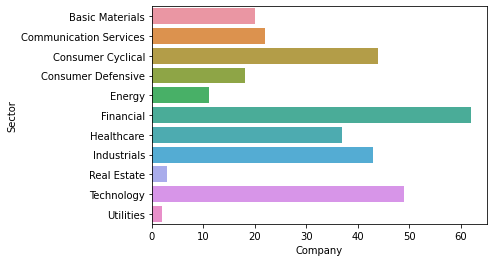

In [20]:
filtered = df_overview[df_overview.index.isin(trend_template_list)]
plotting = pd.DataFrame(filtered.groupby('Sector').count()['Company'])
sns.barplot(y=plotting.index, x=plotting['Company'])


In [5]:
finviz_chart_url = 'https://finviz.com/screener.ashx?v=211&t='

In [29]:
trend_template_str = ','.join(trend_template_list)

In [30]:
trend_template_str = 'A,AAPL,AA'

In [6]:

def finviz_link_charts():
    
    finviz_chart_url = 'https://finviz.com/screener.ashx?v=211&t='
    trend_template_list = pd.merge(df_rs, df_tt, left_index=True, right_index=True).index.tolist()
    
    trend_template_str = ','.join(trend_template_list)
    
    result = finviz_chart_url + trend_template_str
    
    return result
finviz_link_charts()

'https://finviz.com/screener.ashx?v=211&t=ACIA,ACMR,ACTG,AMAT,AOUT,ARGX,ATEC,AXON,BG,BILI,BOMN,CGNX,DAVA,DMTK,EGOV,EVGN,FINV,FLNT,FTHM,FUTU,GTYH,HIMX,ICLK,JEF,JYNT,KLIC,KLR,KOPN,LUNA,MGPI,MWK,NESR,NIO,ONTO,OPRX,OPY,ORGO,PAR,PERI,PROF,QFIN,RBBN,RIOT,RMNI,ROKU,SIMO,SKLZ,SKY,SNBR,SONO,SSP,STKL,STXS,SWAV,TPB,UPWK,UUUU,VERI,VHC,VIPS,VUZI,WATT,WK,WKHS,YY,ACLS,ACRS,AEYE,AKTS,AOSL,API,AVNW,BXC,CLDR,CMBM,CRL,CRON,CTRN,CVLT,DAC,DQ,ECOM,EOLS,EXPI,FPI,FRG,GCI,GH,GNMK,IAC,IIIN,IMGN,INSG,MGNI,MNKD,MXL,NPTN,NVAX,NVEE,ONCT,PACK,PACW,QNST,RCII,RESN,RLGT,RVP,SNAP,STAA,STTK,TTGT,UCTT,VSTO,ZIXI,ZUO,AGRO,ALTM,AMKR,AMRC,APPS,AXTI,BCRX,BGFV,BILL,CASA,CCS,CEVA,CHWY,CLSK,CLXT,CSV,CTSO,CUBI,DGII,DKNG,DOYU,DVAX,DZSI,ERII,ETSY,FFIV,FORM,GWPH,ICHR,INFU,INMD,JOE,JOUT,KC,KLAC,LASR,LOGI,LPRO,MBIN,MDC,MDLA,MEDP,NATR,NIU,NVMI,OSTK,PD,PDD,PHR,PLT,PRTS,QRTEA,QTRX,RADA,REZI,SBGI,SCHN,SGRY,SHOP,SMAR,SMG,SPB,SSTK,TBBK,TCS,TDOC,TSM,TWTR,UCBI,VALE,VCEL,VFF,VIVO,VMI,WSC,ZBRA,ZI,ZLAB,ZNGA,ACA,ALGN,AMSC,ASML,ASO,ATHM,ATLC,AVLR,B

In [1]:
from overview_trial import df_overview
df_overview
#del df_overview['Price']
df_overview

Finviz/20210221_total.csv


,Company,Sector,Industry,Country
Ticker,,,,
A,"Agilent Technologies, Inc.",Healthcare,Diagnostics & Research,USA
AA,Alcoa Corporation,Basic Materials,Aluminum,USA
AACG,ATA Creativity Global,Consumer Defensive,Education & Training Services,China
AACQ,Artius Acquisition Inc.,Financial,Shell Companies,USA
AAIC,Arlington Asset Investment Corp.,Real Estate,REIT - Mortgage,USA
...,...,...,...,...
ZI,ZoomInfo Technologies Inc.,Technology,Software - Application,USA
ZIM,ZIM Integrated Shipping Services Ltd.,Industrials,Marine Shipping,Israel
ZION,"Zions Bancorporation, National Association",Financial,Banks - Regional,USA


In [13]:
pd.read_csv('./Finviz/20210221_total.csv', index_col = 0)

,0,1,2,3,4,5,6,7,8,9,10
0,No.,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
1,1,A,"Agilent Technologies, Inc.",Healthcare,Diagnostics & Research,USA,38.44B,55.11,126.87,-0.63%,1256386
2,2,AA,Alcoa Corporation,Basic Materials,Aluminum,USA,4.25B,-,23.13,9.52%,7212741
3,3,AACG,ATA Creativity Global,Consumer Defensive,Education & Training Services,China,176.54M,-,5.66,-1.57%,495842
4,4,AACQ,Artius Acquisition Inc.,Financial,Shell Companies,USA,956.34M,-,13.20,3.29%,5624494
...,...,...,...,...,...,...,...,...,...,...,...
16,56,ACIC,Atlas Crest Investment Corp.,Financial,Shell Companies,USA,814.00M,-,16.28,-5.02%,9027825
17,57,ACIU,AC Immune SA,Healthcare,Biotechnology,Switzerland,591.54M,-,8.01,1.26%,1099296
18,58,ACIW,"ACI Worldwide, Inc.",Technology,Software - Infrastructure,USA,4.94B,83.03,42.43,-0.52%,474609
19,59,ACKIT,Ackrell SPAC Partners I Co.,Financial,Shell Companies,USA,-,-,10.20,0.29%,70429


In [9]:
url = 'https://finviz.com/screener.ashx'
driver = webdriver.Chrome('./chromedriver')
ticker_input_x = '//*[@id="tickersInput"]'
enter_button_x = '/html/body/table[3]/tbody/tr[1]/td/table/tbody/tr[2]/td[10]/input'
charts_button_x = '//*[@id="screener-content"]/table/tbody/tr[1]/td/table/tbody/tr/td[8]/a'
driver.get(url)